<a href="https://colab.research.google.com/github/ElioRame/ProgrammingAssignment2/blob/master/PALS0039_Ex_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PALS0039 Logo](https://www.phon.ucl.ac.uk/courses/pals0039/images/pals0039logo.png)](https://www.phon.ucl.ac.uk/courses/pals0039/)

#Exercise 3.1 Keras practice

In this exercise we use Keras to build and train a small 4-2-4 [autoencoder](https://en.wikipedia.org/wiki/Autoencoder).

(a) The following code block constructs a simple network with 4 inputs, one hidden layer (with 2 nodes), and 4 outputs. Run the code and add comments to explain what each line does. Is this a regression or classification model? What are the ranges of output values the model is capable of producing?

In [1]:
# Import libraries
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Instructions to build the Keras model
def build_model():
  #building a  odel by specifying: type (sequential, dense), number of nodes, and activation
  ### Variable "model" is of class tensorflow.keras.models.Sequential
  # That class represents neural networks, where one layer is processed after another. (This represents almost all neural networks, but look for skip connections and the ResNet if interested in more powerful architectures. They are used in our application, for example the WaveNet: https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio)
  # The neural network is empty at this point.
  model = Sequential()
  #sequential = appropriate for a simple model where layers are stacked and there is one input tensor and one output tensor
  ## # Class tensorflow.keras.models.Sequential has a function "add" that adds a layer to the network
  # We add the first layer. It is of type Dense, the typical layer in a MLP that is fully connected to the previous layer
  # It has two units. Their activation functions are sigmoids.
  # Because it is the first layer we have to specify the number of inputs. Four inputs for our two nodes lead to 4x2=8 weights, plus 2 bias weights.
  # The name is useful for bigger networks or when we want to copy parts of the network.
  model.add(Dense(2, activation='sigmoid', input_shape=(4,), name="hidden_layer"))
  #layer added, made of two nodes (bottleneck), activation listed as sigmoid
  ## # We add another layers with 4 nodes. The model already knows that this layer receives inputs from the two nodes of the previous layer.
  # This layer will have 2x4 = 8 weights plus 4 bias weights.
  model.add(Dense(4, activation='sigmoid', name="output_layer"))
  #final layer, back to 4 nodes after bottleneck, sigmoid activation
  ### We create an object for the optimizer, from the class SGD, and we name it "sgd". We give it bigger parameters than the defaul to train faster.
  sgd = SGD(learning_rate=0.1, momentum=0.9)
  #compile = loss function and optimiser (could've also added metrics)
  #SGD uses learning rate (how much to change the model's weights after loss function) and momentum (accelerates gradient vectors to reach convergence faster - remember 0,1 vector tutorial SEE NOTES)
  ### The "compile()" of class tensorflow.keras.models.Sequential actually creates the model and we can start training.
  # We specify the loss function to be the mean squared error and the optimizer.
  # If we wanted to use an optimizer with its default values, we could simply specify it by name, for example optimizer='Adam'
  model.compile(loss='mse', optimizer=sgd)
  return model

# Input data
X = np.array([[1.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
# Output data
y = X.copy()

print("Input\n", X)
print("Output\n", y)

#(a)
#ANSWER

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Input
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Output
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


(b) Complete the code block below to train the model on the data defined above using the model's [`fit` method](https://keras.io/api/models/model_training_apis/#fit-method). Use the specification in the comments to set up the training parameters accordingly.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


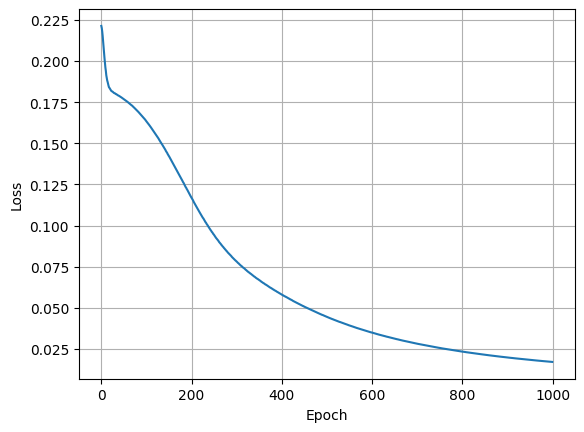

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted:
[[0.83 0.1  0.   0.13]
 [0.12 0.83 0.1  0.  ]
 [0.01 0.17 0.81 0.12]
 [0.13 0.01 0.16 0.8 ]]


In [6]:
# Build the model using the earlier function
model = build_model()

# Train the model using 1000 iterations through the dataset with weight updates after processing each individual sample:
#(b)
#ANSWER
training_info = model.fit(X, y, epochs=1000, batch_size=2, verbose=0)

# Plot the value of the loss function over training
plt.plot(training_info.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Print the predicted output values for the training data
print("Predicted:", np.around(model.predict(X), decimals=2), sep="\n")


The following code block displays the network configuration, including number of parameters (weights) that were estimated during training. Furthermore it displays the actual weights and biases of the trained model.

In [5]:
# Print a summary of the structure of the model
model.summary()

# Get the weights as a numpy array
weights=model.get_weights()

# Print the weights for the different layers
print()
print("hidden-to-input:", weights[0], "", sep="\n")
print("hidden-bias:", weights[1], "", sep="\n")
print("output-to-hidden:", weights[2], "", sep="\n")
print("output-bias:", weights[3], "", sep="\n")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 4)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46 (188.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24 (100.00 B)


hidden-to-input:
[[-3.4782207   0.99167603]
 [ 2.7804868  -2.8811035 ]
 [ 2.018962    3.247313  ]
 [-1.0281476  -1.606447  ]]

hidden-bias:
[ 0.07618751 -0.38556382]

output-to-hidden:
[[-5.054643   3.4613616  1.9399446 -1.3656554]
 [ 1.7221152 -4.116991   3.8117838 -1.9110007]]

output-bias:
[ 0.18677254 -1.7439411  -3.9192574   0.39329308]



(c) Using the sigmoid function defined below, write some code to manually calculate the outputs of the network using the `weights` and `X` as input. **OR** Explain how the weights and biases are used to calculate the networks outputs.

In [10]:
# definition of the signoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


#(c)
#ANSWER
for i in range(4):
  input = X[i]
  output_hidden = sigmoid(np.matmul(input, weights[0]) + weights[1])
  output_output = sigmoid(np.matmul(output_hidden, weights[2]) + weights[3])
  print(input, np.around(output_hidden, decimals=2), np.around(output_output, decimals=2), sep="\t")

[1. 0. 0. 0.]	[0.03 0.65]	[0.76 0.01 0.2  0.29]
[0. 1. 0. 0.]	[0.95 0.04]	[0.01 0.8  0.13 0.28]
[0. 0. 1. 0.]	[0.89 0.95]	[0.06 0.07 0.8  0.07]
[0. 0. 0. 1.]	[0.28 0.12]	[0.27 0.22 0.05 0.45]


(d) What are autoencoders useful for?

In [ ]:
#https://en.wikipedia.org/wiki/Autoencoder#Applications

#As the dimensionality is reduced, information is embedded more efficiently into a hidden layer with less units and then constructed again